In [1]:
import pandas as pd
# build a simple linear regression in python
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn')
sns.set(style="white")
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from math import exp
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import warnings
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/Users/joeybillet/Downloads/USA_cars_datasets.csv")
print(df.shape)
print(df.dtypes)

(2499, 13)
Unnamed: 0       int64
price            int64
brand           object
model           object
year             int64
title_status    object
mileage          int64
color           object
vin             object
lot              int64
state           object
country         object
condition       object
dtype: object


### Data Cleaning

In [3]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,door,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


- We first drop the "Unnamed" column

In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
pd.set_option('display.max_rows', None)

- After looking at the data in "condition" we drop all of the "Listing Expired".

In [6]:
i=0
index_to_drop = []
for thing in df['condition']:
    if thing=='Listing Expired':
        index_to_drop.append(i)
        i+=1
    else:
        i+=1

In [7]:
for thing in index_to_drop:
    df.drop([thing], inplace = True)

- Change all of the "condition" rows to equal days rather than minutes and hours.

In [8]:
new_column = []
for thing in df['condition']:
    if thing[-9]=='d':
        if thing[1]!=' ':
            new_column.append(int(thing[0:2]))
        elif thing[1]==' ':
            new_column.append(int(thing[0]))
    elif thing[-7]=='m':
        if thing[1]!=' ':
            new_column.append(int(thing[0:2])/60/24)
        elif thing[1]==' ':
            new_column.append(int(thing[0])/60/24)
    elif thing[-10]=='h':
        if thing[1]!=' ':
            new_column.append(int(thing[0:2])/24)
        elif thing[1]==' ':
            new_column.append(int(thing[0])/24)

In [9]:
df['condition']=new_column

In [10]:
df.head(10)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10.000000
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6.000000
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2.000000
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,0.916667
4,27700,chevrolet,door,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,0.916667
5,5700,dodge,mpv,2018,clean vehicle,45561,white,2c4rdgeg9jr237989,167655771,texas,usa,2.000000
6,7300,chevrolet,pk,2010,clean vehicle,149050,black,1gcsksea1az121133,167753872,georgia,usa,0.916667
7,13350,gmc,door,2017,clean vehicle,23525,gray,1gks2gkc3hr326762,167692494,california,usa,0.833333
8,14600,chevrolet,malibu,2018,clean vehicle,9371,silver,1g1zd5st5jf191860,167763267,florida,usa,0.916667
9,5250,ford,mpv,2017,clean vehicle,63418,black,2fmpk3j92hbc12542,167656121,texas,usa,2.000000


- Check value counts to ensure everything is in the correct format (days).

In [11]:
df.condition.value_counts()

2.000000     832
0.875000     492
3.000000     137
0.583333     108
1.000000     100
8.000000      82
0.708333      76
0.833333      67
9.000000      58
0.916667      57
6.000000      52
0.750000      48
0.791667      45
7.000000      43
11.000000     42
0.666667      36
0.083333      26
10.000000     23
0.020139      18
0.958333      16
0.208333      16
4.000000      16
0.000694      15
0.250000      12
12.000000      8
0.625000       8
0.291667       7
0.023611       7
5.000000       6
15.000000      4
0.006250       3
0.041667       3
0.032639       2
0.125000       2
0.033333       2
0.500000       1
0.018750       1
0.022222       1
0.036806       1
0.025000       1
0.019444       1
0.011111       1
13.000000      1
0.166667       1
0.020833       1
Name: condition, dtype: int64

In [12]:
df= df[df['price'] != 0]

In [13]:
df.price.value_counts()

16500    26
13900    21
15500    19
15000    19
25       18
18500    17
22500    17
25000    17
8000     17
9200     16
23500    15
33000    15
23000    15
17500    14
21500    14
19500    14
19000    14
26000    14
29000    14
28500    14
13500    14
13800    14
13000    14
11000    13
25500    13
14500    13
17000    13
15800    13
15700    13
26500    13
21000    12
18000    12
22000    12
28000    12
16000    12
24500    12
30000    12
11200    12
15600    11
7500     11
31500    11
3000     11
10500    11
20000    11
15900    11
12800    11
14000    11
22800    11
15400    10
23400    10
22600    10
16900    10
18200    10
29500    10
20500    10
13700    10
16300    10
9000     10
14700    10
18300     9
6500      9
27000     9
10400     9
16800     9
17200     9
24000     9
18800     9
10800     9
16600     9
15200     9
13200     9
5000      9
22700     9
49000     8
6000      8
31000     8
34000     8
12500     8
16700     8
24700     8
15300     7
10300     7
12000     7
2430

In [14]:
df.shape

(2436, 12)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2436.0,1.903590e+04,11899.610500,2.500000e+01,1.050000e+04,17000.0,2.580000e+04,84900.0
year,2436.0,2.016930e+03,2.966133,1.973000e+03,2.016000e+03,2018.0,2.019000e+03,2020.0
mileage,2436.0,5.014733e+04,54762.851653,0.000000e+00,2.127175e+04,34956.5,6.005075e+04,1017936.0
lot,2436.0,1.676941e+08,203649.625305,1.593488e+08,1.676257e+08,167745153.5,1.677799e+08,167805500.0
condition,2436.0,2.312008e+00,2.554089,6.944444e-04,8.750000e-01,2.0,2.000000e+00,15.0


In [16]:
df.corr()

,price,year,mileage,lot,condition
price,1.000000,0.385809,-0.387825,0.137471,-0.000434
year,0.385809,1.000000,-0.599741,0.114767,-0.034881
mileage,-0.387825,-0.599741,1.000000,-0.110806,-0.032815
lot,0.137471,0.114767,-0.110806,1.000000,-0.216712
condition,-0.000434,-0.034881,-0.032815,-0.216712,1.000000


In [17]:
df.dtypes

price             int64
brand            object
model            object
year              int64
title_status     object
mileage           int64
color            object
vin              object
lot               int64
state            object
country          object
condition       float64
dtype: object

- Check for NaN's

In [18]:
df.isnull().sum().sort_values(ascending = False)

condition       0
country         0
state           0
lot             0
vin             0
color           0
mileage         0
title_status    0
year            0
model           0
brand           0
price           0
dtype: int64

In [19]:
df.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [20]:
df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10.000000
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6.000000
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2.000000
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,0.916667
4,27700,chevrolet,door,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,0.916667


### Exploratory Data Analysis

- Due to teh fact that there are multiple brands, models, countries, states, and colors of cars we created dummy variable to account for each column.

In [21]:
df = pd.concat([df, pd.get_dummies(df['brand'])], 1)
df = pd.concat([df, pd.get_dummies(df['model'])], 1)
df = pd.concat([df, pd.get_dummies(df['country'])], 1)
df = pd.concat([df, pd.get_dummies(df['state'])], 1)
df = pd.concat([df, pd.get_dummies(df['color'])], 1)

In [22]:
df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,...,silver,super black,tan,toreador red,triple yellow tri-coat,turquoise,tuxedo black metallic,white,white platinum tri-coat metallic,yellow
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,...,0,0,0,0,0,0,0,0,0,0
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,...,1,0,0,0,0,0,0,0,0,0
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,...,1,0,0,0,0,0,0,0,0,0
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,...,0,0,0,0,0,0,0,0,0,0
4,27700,chevrolet,door,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,...,0,0,0,0,0,0,0,0,0,0


- We changed "title_status" to either a 1 or a zero so we can account for either a clean car or salvage insurance in our model

In [23]:
df['title_status'] = np.where(df['title_status'] == 'clean vehicle', 1,0)

- Once our dummy variabls and "title_status" are set, we can now drop the columns.

In [24]:
df.drop(columns = ['brand', 'model', 'color', 'state', 'lot', 'vin', 'country'], inplace = True)

In [25]:
df.head()

,price,year,title_status,mileage,condition,acura,audi,bmw,buick,cadillac,...,silver,super black,tan,toreador red,triple yellow tri-coat,turquoise,tuxedo black metallic,white,white platinum tri-coat metallic,yellow
0,6300,2008,1,274117,10.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2899,2011,1,190552,6.000000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,5350,2018,1,39590,2.000000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,25000,2014,1,64146,0.916667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27700,2018,1,6654,0.916667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.columns

Index(['price', 'year', 'title_status', 'mileage', 'condition', 'acura',
       'audi', 'bmw', 'buick', 'cadillac',
       ...
       'silver', 'super black', 'tan', 'toreador red',
       'triple yellow tri-coat', 'turquoise', 'tuxedo black metallic', 'white',
       'white platinum tri-coat metallic', 'yellow'],
      dtype='object', length=245)

- While preparing our model, it is important to check for any outliers. The price, mileage, and year all showed significant outliers which were dropped below.

In [27]:
df = df[(df['price']<50000) & (df['price']>5000)]

In [28]:
len(df[(df['mileage']>100000)])

157

In [29]:
df = df[(df['mileage']>5000)&(df['mileage']<100000)]

In [30]:
len(df[(df['mileage']>5000)&(df['mileage']<100000)])

1929

In [31]:
len(df[(df['year']<2010)])

4

In [32]:
df = (df[(df['year']>2010)])

In [33]:
len(df[(df['year']<1980)])

0

### Visualizations

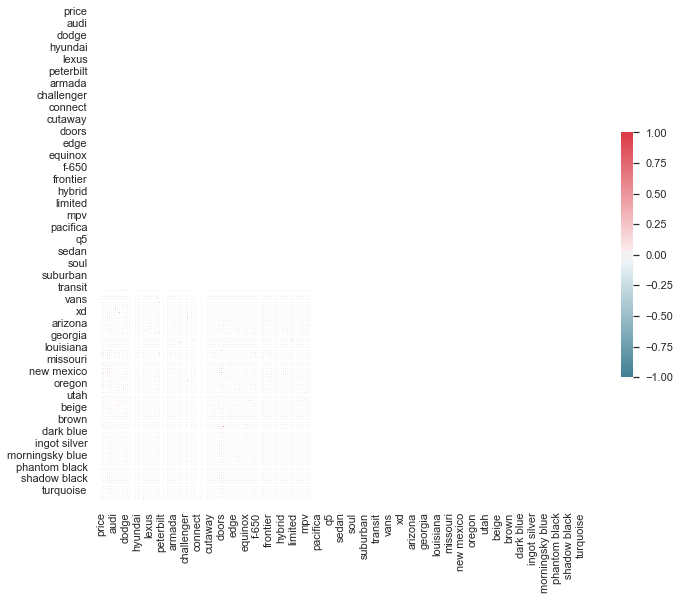

In [34]:
sns.set(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
f.savefig('corr_bball.png', bbox_inches='tight');

- We then checked for multicoliniarity 

In [35]:
stuff=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
stuff['pairs'] = list(zip(stuff.level_0, stuff.level_1))
stuff.set_index(['pairs'], inplace = True)
stuff.drop(columns=['level_1', 'level_0'], inplace = True)
stuff.columns = ['cc']
stuff.drop_duplicates(inplace=True)
stuff[(stuff.cc>.75) & (stuff.cc <1)]

,cc
pairs,
"(bmw, series)",0.762766


In [36]:
subset = df.columns

- Is there a positive or negative correlation between mileage and price?

Text(0.5, 1.0, 'Correlation Between Used Car Mileage and Price')

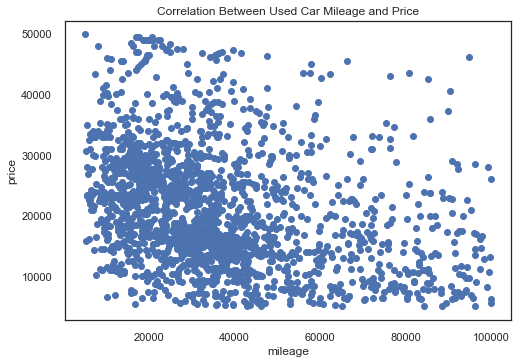

In [65]:
plt.scatter(df['mileage'], df['price'])
plt.xlabel('mileage')
plt.ylabel('price')
plt.title('Correlation Between Used Car Mileage and Price')

- We see a negative correlation between mileage and price. As the mileage increases, price decreases.

- Will a used car be more expensive the older it is? 


Text(0.5, 1.0, 'Correlation Between Age of a Used Car and Price')

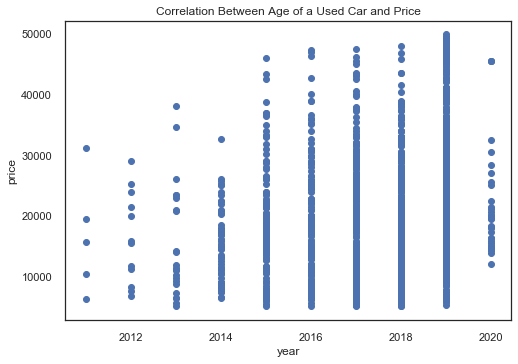

In [66]:
plt.scatter(df['year'], df['price'])
plt.xlabel('year')
plt.ylabel('price')
plt.title('Correlation Between Age of a Used Car and Price')

- We can clearly see that the older the car is, the more likely it will have a higher asking price.

Text(0.5, 1.0, 'Correlation Between Used Car Age and Price')

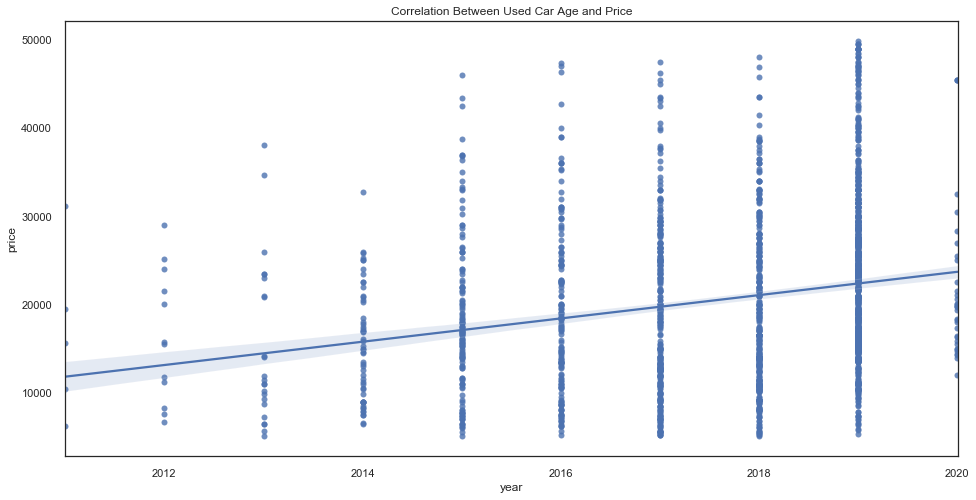

In [106]:
data = df[['price','year']]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.regplot(x='year', y="price", data=data)
plt.title('Correlation Between Used Car Age and Price')

- Will the time remaining (condition) effect the bidding price?

Text(0.5, 1.0, 'Correlation Between Time Left on Bidding and Price')

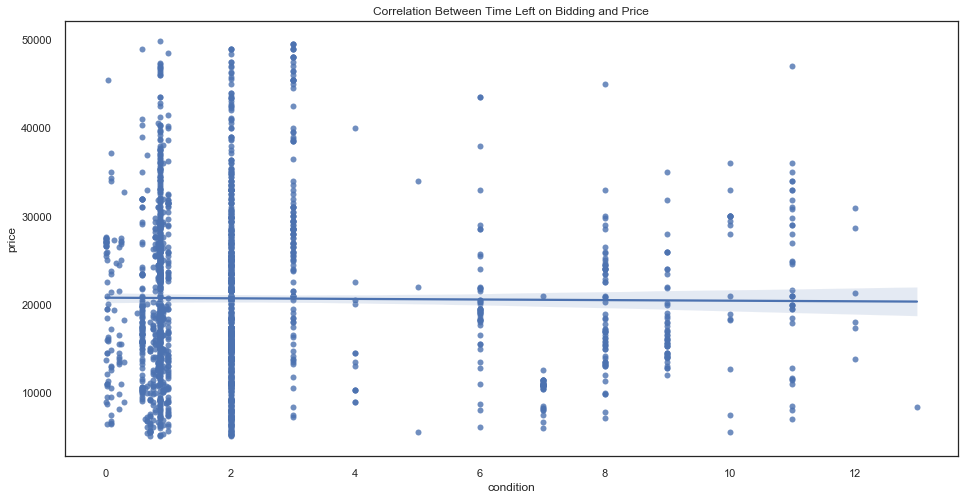

In [68]:
data = df[['price','condition']]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.regplot(x='condition', y="price", data=data)
plt.title('Correlation Between Time Left on Bidding and Price')

- As seen above, as time decreases, price increases so it is highly effected.

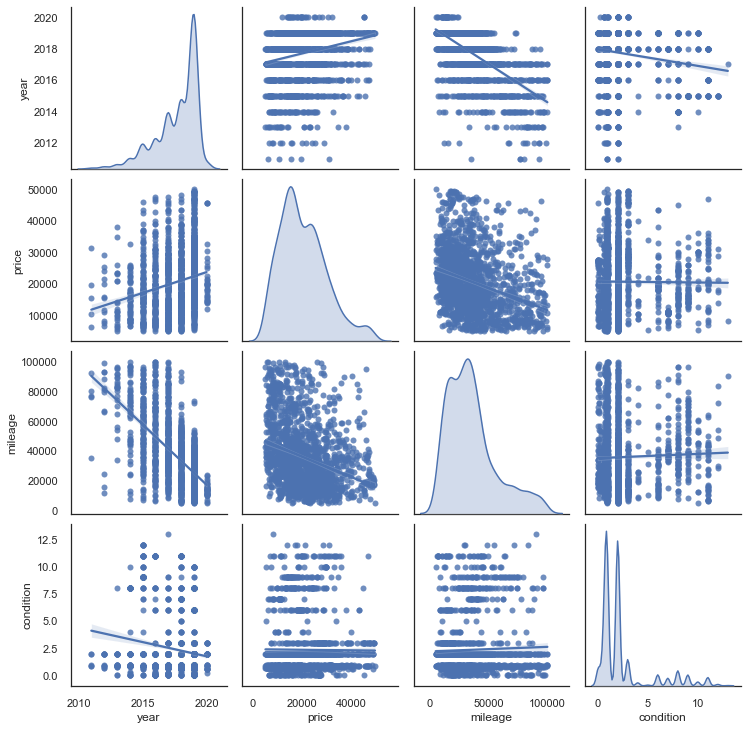

In [41]:
pair_plot= ['year','price','mileage', 'condition']
sns.pairplot(df[pair_plot],  kind="reg", diag_kind = "kde"   )
plt.show()

### Train Test Split

In [42]:
df.head()

,price,year,title_status,mileage,condition,acura,audi,bmw,buick,cadillac,...,silver,super black,tan,toreador red,triple yellow tri-coat,turquoise,tuxedo black metallic,white,white platinum tri-coat metallic,yellow
2,5350,2018,1,39590,2.000000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,25000,2014,1,64146,0.916667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27700,2018,1,6654,0.916667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5700,2018,1,45561,2.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,13350,2017,1,23525,0.833333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### How does our data hold up using the different models below? 

- The first model chosen to test our data is a Linear Regression model.The Training RMSE (5033.11227254609) came quite close to the Testing RMSE (5638.266145569779) with a Testing Error of 0.583737968375378

In [111]:
def test_train(abc):
    target = abc['price']
    df_features= abc.drop(columns= ['price'])
    X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.3)
    #scaler2 = StandardScaler()
    # fit the scaler to the training data
    #scaler2.fit(X_train)
    #transform the training data
    #X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_features.columns)
    #transform the testing dat
    #X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_features.columns)
    lm_2 = LinearRegression()
    #fit the linear regression to the data
    lm_2 = lm_2.fit(X_train, y_train)
    y_train_pred = lm_2.predict(X_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    print('Training RMSE:' , train_rmse)
    # use fitted model to predict on test data
    y_pred = lm_2.predict(X_test)
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Testing RMSE:' , test_rmse)
    print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
    print('R^2 for training data:', lm_2.score(X_train, y_train))
    print('R^2 for testing data:', lm_2.score(X_test, y_test))
    print('Testing Error:', test_rmse/y_train.std())
    return

In [112]:
df.price.describe()

count     1924.000000
mean     20687.661123
std       9521.435620
min       5090.000000
25%      13800.000000
50%      19000.000000
75%      26500.000000
max      49900.000000
Name: price, dtype: float64

In [113]:
test_train(df)

Training RMSE: 5033.11227254609
Testing RMSE: 5638.266145569779
Training:  5033 vs. Testing:  5638
R^2 for training data: 0.7282680207637122
R^2 for testing data: 0.6223618124526593
Testing Error: 0.583737968375378


In [46]:
df_features = df.drop(columns= ['price'])
target = df['price']

- The next model used was the Lasso Model. Surprisingly, the Lasso Model perfmored better than the Linear Regression Model outputting a Training RMSE of 5033.116070372421 compared to the Testing RMSE of 5631.757613282632

In [47]:
## training the model
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.3)
lasso = Lasso(alpha=0.01, normalize=True)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training RMSE: '+ str(train_rmse) )
print('Testing RMSE: '+ str(test_rmse) )

Training RMSE: 5033.116070372421
Testing RMSE: 5631.757613282632


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 836332305.8883438, tolerance: 12548087.66679287
  positive)


- The third model used was the Two Degree Polynomial. The Training RMSE performed better outputting  2345.3282143779556. The Testing RMSE performed worse with an output of 95716582.85162261

In [48]:
def two_degree_polynomial(df_features,target):
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=2, include_bias = False)
    poly_data = poly.fit_transform(df_features)
    poly_columns = poly.get_feature_names(df_features.columns)
    df_poly = pd.DataFrame(poly_data, columns = poly_columns)
    lm_2 = LinearRegression()
    lm_2 = lm_2.fit(df_poly, target)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_poly, target, random_state = 34, test_size=0.2)
    lm = LinearRegression()
    lm = lm.fit(X_train, y_train)
    y_train_pred = lm.predict(X_train)
    mae = metrics.mean_absolute_error(y_train, y_train_pred)
    mse = metrics.mean_squared_error(y_train, y_train_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    y_test_pred = lm.predict(X_test)
    mae2 = metrics.mean_absolute_error(y_test, y_test_pred)
    mse2 = metrics.mean_squared_error(y_test, y_test_pred)
    rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    print('R^2:', lm_2.score(df_poly, target))
    print('Training set - Features:', X_train.shape, 'Target:', y_train.shape)
    print('Training set - Features:', X_test.shape, 'Target:', y_test.shape)
    print('Training Mean Absolute Error:', mae )
    print('Training Mean Squared Error:',  mse)
    print('Training Root Mean Squared Error:' , rmse)
    print('Testing Mean Absolute Error:', mae2 )
    print('Testing Mean Squared Error:',  mse2)
    print('Testing Root Mean Squared Error:' , rmse2)
two_degree_polynomial(df_features,target)

R^2: 0.9083058175160608
Training set - Features: (1539, 30134) Target: (1539,)
Training set - Features: (385, 30134) Target: (385,)
Training Mean Absolute Error: 1099.5715095137064
Training Mean Squared Error: 5500564.433157289
Training Root Mean Squared Error: 2345.3282143779556
Testing Mean Absolute Error: 12133721.191721592
Testing Mean Squared Error: 9161664232791536.0
Testing Root Mean Squared Error: 95716582.85162261


In [49]:
names = df.columns[1:33]
df_features = df[names]
target = df['price']

In [50]:
df.columns[1:33]

Index(['year', 'title_status', 'mileage', 'condition', 'acura', 'audi', 'bmw',
       'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ford', 'gmc',
       'harley-davidson', 'heartland', 'honda', 'hyundai', 'infiniti',
       'jaguar', 'jeep', 'kia', 'land', 'lexus', 'lincoln', 'maserati',
       'mazda', 'mercedes-benz', 'nissan', 'peterbilt', 'ram', 'toyota'],
      dtype='object')

- The model to perform worst was the Third Degree Polynomial. With the Training RMSE as 7738.760059221686 and the Testing RMSE as 1400107388.5046332, this model underperformed the rest by a tremendous amount

In [51]:
def third_degree_polynomial(df_features, target):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import train_test_split
    poly_3 = PolynomialFeatures(degree=3, include_bias = False)
    poly3_data = poly_3.fit_transform(df_features)
    poly3_columns = poly_3.get_feature_names(df_features.columns)
    df_poly3 = pd.DataFrame(poly3_data, columns = poly3_columns)
    lm_3 = LinearRegression()
    lm_3 = lm_3.fit(df_poly3, target)
    X_train, X_test, y_train, y_test = train_test_split(df_poly3, target, random_state = 34, test_size=0.2)
    lm3 = LinearRegression()
    lm3 = lm3.fit(X_train, y_train)
    y_train_pred = lm3.predict(X_train)
    mae = metrics.mean_absolute_error(y_train, y_train_pred)
    mse = metrics.mean_squared_error(y_train, y_train_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    y_test_pred = lm3.predict(X_test)
    mae2 = metrics.mean_absolute_error(y_test, y_test_pred)
    mse2 = metrics.mean_squared_error(y_test, y_test_pred)
    rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    print('R^2:', lm_3.score(df_poly3, target))
    print('Training set - Features:', X_train.shape, 'Target:', y_train.shape)
    print('Training set - Features:', X_test.shape, 'Target:', y_test.shape)
    print('Training Mean Absolute Error:', mae )
    print('Training Mean Squared Error:',  mse)
    print('Training Root Mean Squared Error:' , rmse)
    print('Testing Mean Absolute Error:', mae2 )
    print('Testing Mean Squared Error:',  mse2)
    print('Testing Root Mean Squared Error:' , rmse2)
third_degree_polynomial(df_features, target)

R^2: 0.29134693285804036
Training set - Features: (1539, 6544) Target: (1539,)
Training set - Features: (385, 6544) Target: (385,)
Training Mean Absolute Error: 5782.780277350531
Training Mean Squared Error: 59888407.25420483
Training Root Mean Squared Error: 7738.760059221686
Testing Mean Absolute Error: 111617330.12900832
Testing Mean Squared Error: 1.9603006993452636e+18
Testing Root Mean Squared Error: 1400107388.5046332


## Hypothesis Testing


#### Comparing price means for mileage, year and condition for used cars

#### ANOVA 
H0: There is no significant difference in used car prices and mileage

Ha: There is a significant difference in used car prices and mileage 

- We first chose to use an Anova Test to test our hypothesis

In [108]:
df_mileage = df[['price','mileage']]
df_mileage.dropna(inplace=True)
df_mileage

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,price,mileage
2,5350,39590
3,25000,64146
4,27700,6654
5,5700,45561
7,13350,23525
8,14600,9371
9,5250,63418
11,12920,39650
12,31900,22909
15,12710,25747


In [109]:
stats.f_oneway(df_mileage['price'][df_mileage['mileage'] < 33000],
               df_mileage['price'][df_mileage['mileage'] <= 66000],
               df_mileage['price'][df_mileage['mileage'] > 66000])

F_onewayResult(statistic=56.28195170657985, pvalue=1.0374327074104347e-24)

- Result is significant with very low p-value. We can reject the null which the means are equal for these groups


### Chi-Sqaured Hypothesis 


- H0: Year and Price are independent with used cars 

- Ha: Year and Price are not independent with used cars

In [95]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [df['year'], df['price']]
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1923
probability=0.950, critical=2026.132, stat=866970.789
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


- Reject null hypotheis that two features (year and price) are independent

### Chi-Sqaured Hypothesis 


- Condition and Price are independent with used cars 

- Condition and Price are not independent with used cars

In [103]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [df['condition'], df['price']]
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1923
probability=0.950, critical=2026.132, stat=7667.650
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


- Reject null hypotheis that two features (condition and price) are independent